In [2]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import io

path = './files/TC/'

Utilizando a biblioteca skimage, lemos uma das imagens de tomografia, com formato .tiff. Observa-se que a imagem tem uma largura e uma altura de 925px e 920px, respectivamente.

In [6]:
img = io.imread(path+'antes0900.tiff')
print(img.shape)

(925, 920)


Abaixo, plotamos a imagem mapeadas à cor cinza, ao lado de uma barra de cores, indicando a escala de intensidade de cor dos pixels individuais.

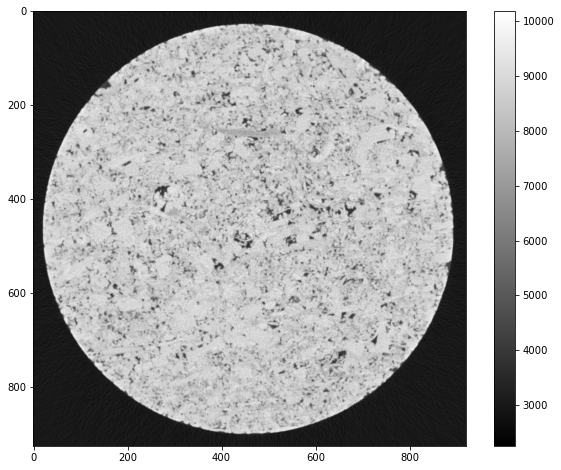

In [12]:
plt.figure(figsize=(10,8))
plt.imshow(img, cmap='gray')
plt.colorbar()
plt.show()

Podemos observar abaixo que as imagens tem valores de pixels que variam de um mínimo de 2259 até um máximo de 10184.

In [13]:
img

array([[2755, 2831, 3188, ..., 3022, 3115, 3140],
       [3069, 2848, 3091, ..., 2988, 3125, 3154],
       [3066, 2981, 3074, ..., 3057, 3239, 2980],
       ...,
       [2986, 3102, 3109, ..., 2927, 2980, 3155],
       [3056, 3133, 2796, ..., 3133, 2916, 3065],
       [3053, 2865, 2813, ..., 2927, 2990, 2958]], dtype=uint16)

In [17]:
print(img.max())
print(img.min())

10184
2259


Ao plotar um histograma, podemos observar picos de intensidade nos intervalos de 2500 até 3500 (provavelmente devido ao espaço preto em volta do circulo no centro da imagem) e 7500 e 9000 (provavelmente devido à maior ocorrência da cor branca no círculo central).

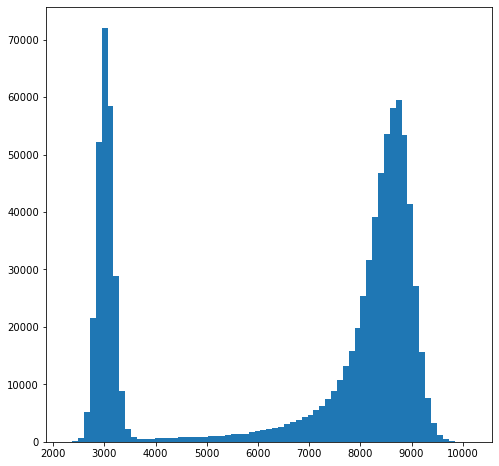

In [15]:
plt.figure(figsize=(8,8))
n, bins, patches = plt.hist(img.ravel(), bins='auto')
plt.show()

Abaixo, podemos ver quantos pixels encontram-se em cada intervalo (bin) do histograma acima. Verificamos, por exemplo, que o primeiro intervalo contém apenas 7 pixels. Em seguida, mostramos o valor de cada intervalo, ou seja, a altura de cada uma das barras do histograma. 

In [18]:
print(n.shape, bins.shape)
print(f' n={n} \n bins={bins}')

(69,) (70,)
 n=[7.0000e+00 6.2000e+01 7.4400e+02 5.1900e+03 2.1518e+04 5.2181e+04
 7.2100e+04 5.8457e+04 2.8776e+04 8.8120e+03 2.1770e+03 7.5200e+02
 4.7800e+02 4.5300e+02 5.3800e+02 6.0600e+02 6.0800e+02 6.6600e+02
 6.9700e+02 7.6600e+02 7.9200e+02 8.0800e+02 9.1300e+02 8.7600e+02
 9.5200e+02 1.0190e+03 1.0600e+03 1.2470e+03 1.3100e+03 1.4270e+03
 1.4350e+03 1.6810e+03 1.8430e+03 1.9940e+03 2.1490e+03 2.4460e+03
 2.6050e+03 3.0200e+03 3.4140e+03 3.7900e+03 4.2470e+03 4.6770e+03
 5.5780e+03 6.1750e+03 7.4270e+03 8.8910e+03 1.0702e+04 1.3128e+04
 1.5827e+04 1.9832e+04 2.5351e+04 3.1606e+04 3.9100e+04 4.6747e+04
 5.3505e+04 5.8070e+04 5.9478e+04 5.3324e+04 4.1329e+04 2.7208e+04
 1.5577e+04 7.6140e+03 3.2880e+03 1.2420e+03 4.7400e+02 1.6600e+02
 4.8000e+01 1.6000e+01 4.0000e+00] 
 bins=[ 2259.          2373.85507246  2488.71014493  2603.56521739
  2718.42028986  2833.27536232  2948.13043478  3062.98550725
  3177.84057971  3292.69565217  3407.55072464  3522.4057971
  3637.26086957  3752.11

Abaixo fazemos a leitura de todas as imagens contidas na pasta TC, armazenando-as como numpy arrays na variável `vol`.

In [40]:
root = 'antes0'
vol = np.zeros((12, 925, 920), dtype='uint16')
for i in range(900, 912):
    fname = path+root+f'{i}.tiff'
    vol[i-900,:,:] = io.imread(fname)

In [44]:
vol[11]

array([[3048, 3077, 3084, ..., 3029, 2887, 2964],
       [2934, 3043, 2975, ..., 2890, 2984, 3040],
       [2962, 3012, 3055, ..., 3021, 2992, 2992],
       ...,
       [3134, 3221, 3124, ..., 3072, 3020, 2944],
       [3163, 2989, 2984, ..., 3115, 3154, 3241],
       [3044, 2988, 3103, ..., 3280, 3109, 3168]], dtype=uint16)

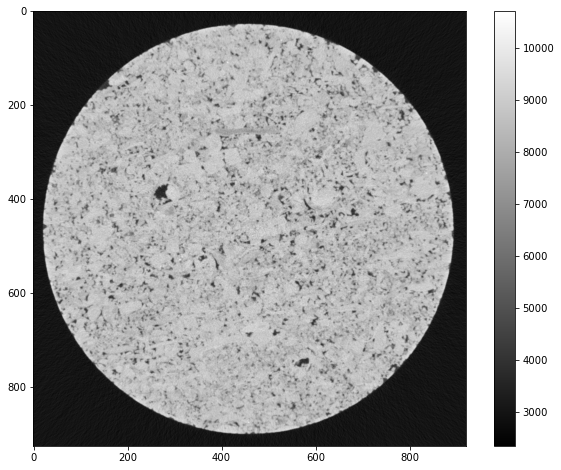

In [45]:
plt.figure(figsize=(10,8))
plt.imshow(vol[11,:], cmap='gray')
plt.colorbar()
plt.show()

Por fim, podemos aplicar uma normalização aos pixels das imagens, removendo os pixels abaixo e a acima de um determinado limite, o que nos permite analisar a imagem melhor, ignorando por exemplo os pixels que pertencem ao preto ao redor da imagem, os quais provavelmente não são relevantes à análise.

In [46]:
def scale(dat, x_min, x_max, nx_min, nx_max):
    dat = (dat-x_min) * ((nx_max-nx_min)/(x_max-x_min)) + nx_min
    dat[dat > nx_max] = nx_max
    dat[dat < nx_min] = nx_min
    return dat

vol_f = scale(vol.astype(np.float32), 4000, 10000, 0, 1)

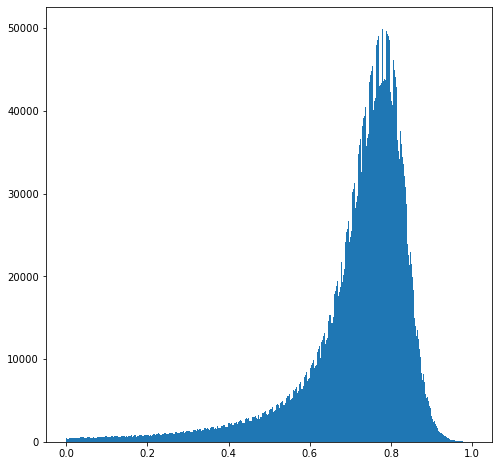

In [52]:
data = vol_f[vol_f > 0]
plt.figure(figsize=(8,8))
n, bins, patches = plt.hist(data.ravel(), bins='auto')
plt.show()